# **WARNING**

In order for this notebook to run, you must first run the notebook `2_0_generate_turn_data.ipynb` and generate the file `result/singlegame_results/player10_turn_results.csv` which contains the optimal policy and value functions for the solved MDPs for different player skill model and epsilon combinatinos. It is also important to make sure that all combinations you want to analyse in this file were generated during this process. 

# 1.0 Notebook Parameters

Please specify the following variables:
1. `project_directory`: your project directory path
2. `epsilon_list`: the list of execution error multiplers (epsilon) that you want to consider in your analysis.
3. `player_id`: the players (i.e. skill model) you want to consider in your analysis; use one base model and scale it with different epsilons; this should match whatever was used in `1_0_generate_noturn_data.ipynb`.
4. `default_iterations`: the number of iterations that should be used for each simulation run. 

In [1]:
# Change this to the project directory path for your computer  
project_directory = '/Users/rachael/Desktop/darts-thesis'
project_directory = '/Users/Craig/PycharmProjects/darts-thesis'

# Set the epsilons that will be considered in this analysis 
epsilon_list = [1,2,3,4,5,6,7,8,9]

# Set the ID of the player skill models you want to use 
    # 10 - symmetric DB skill model that we were using up until now 
    # "AVG" - "average pro" skill model generated by H & W 
player_id = "AVG"

# Set the number of iterations you want to use in your simulations
default_iterations = 10#10000


# 2.0 Notebook Setup

In [2]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

from class_simulator_turn import Simulator

import class_handicap as hc 
handicap = hc.Handicap(results_file_name='./result/singlegame_results/playerAVG_noturn_results.csv', epsilon_list = epsilon_list)

# import function_init_baoard as fb
# import function_init_simple_mdp as imdp

In [3]:
# Import external libraries

import time 

import pandas as pd

import numpy as np

import statistics


# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", message="overflow encountered in divide")


In [4]:
# Helper functions 

def build_dataset(simulation_paths,player_num,epsilon,tokens):
    data_list = []
    data_cols = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']

    for game in range(len(simulation_paths)):

        for throw in range(len(simulation_paths[game])):

            data_list.append([player_num,epsilon,tokens,game,throw,simulation_paths[game][throw],simulation_paths[game][throw][0],simulation_paths[game][throw][1]])

    df = pd.DataFrame(data_list,columns=data_cols)

    return df 


def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [5]:
# Initialize Simulators for different e (takes about 5 minutes to run for 9 epsilon values)

sim_list = []


for epsilon in epsilon_list:
    
    sim_list.append(Simulator(player_num=player_id,epsilon=epsilon))


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:761: RuntimeWarning: divide by zero encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:761: RuntimeWarning: overflow encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:799: RuntimeWarning: divide by zero encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:799: RuntimeWarning: overflow encountered in true_divide
  num_tothrow = num_tothrow / prob_otherstate
C:\Users\Craig\PycharmProjects\darts-thesis\function_helpers_singleplayer.py:1218: RuntimeWarning: divide by zero encountered in true_divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_notbust_dic_nt[score_max]
C:\Users\Craig

solve prob_policy_transit in 1.5812807083129883 seconds
solve dp_turn_policyiter in 14.24962592124939 seconds
[[0.     0.     1.7753 ... 5.8006 5.7975 5.8203]
 [0.     0.     1.     ... 5.079  5.0774 5.0926]
 [0.     0.     1.     ... 4.8361 4.8371 4.8479]
 ...
 [0.     0.     1.     ... 3.8317 3.8327 3.8341]
 [0.     0.     1.     ... 3.5819 3.5819 3.5819]
 [0.     0.     1.     ... 3.     3.     3.    ]]
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/playerAVG_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
solve prob_policy_transit in 2.176503896713257 seconds
solve dp_turn_policyiter in 15.766590118408203 seconds
[[0.     0.     2.4054 ... 7.6096 7.6209 7.6342]
 [0.     0.     1.     ... 6.3557 6.3661 6.3794]
 [0.     0.     1.     ... 5.9407 5.9508 5.9643]
 ...
 [0.     0.     1.     ... 4.0235 4.0313 4.041 ]
 [0.     0.     1.     ... 3.7253 3.7318 3

# 3.0 Evaluating Win Probabiilites

## 3.1 Baseline - No Handicap

In [6]:
#################### PARAMETERS #########################
# Set player epsilons (0 vs 1 is arbitrary)
e0 = 2
e1 = 1

# Can override iterations here if desired
iterations = 100 #  default_iterations 

########################################################

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes.append([player_id,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.058s.
Ran in 0.025s.
Ran in 0.029s.
Ran in 0.036s.
Ran in 0.023s.
Ran in 0.037s.
Ran in 0.024s.
Ran in 0.049s.
Ran in 0.057s.
Ran in 0.050s.
Ran in 0.020s.
Ran in 0.050s.
Ran in 0.033s.
Ran in 0.057s.
Ran in 0.020s.
Ran in 0.070s.
Ran in 0.015s.
Ran in 0.060s.
Ran in 0.041s.
Ran in 0.039s.
Ran in 0.034s.
Ran in 0.037s.
Ran in 0.033s.
Ran in 0.047s.
Ran in 0.030s.
Ran in 0.060s.
Ran in 0.035s.
Ran in 0.050s.
Ran in 0.035s.
Ran in 0.060s.
Ran in 0.030s.
Ran in 0.061s.
Ran in 0.039s.
Ran in 0.100s.
Ran in 0.040s.
Ran in 0.030s.
Ran in 0.050s.
Ran in 0.050s.
Ran in 0.040s.
Ran in 0.045s.
Ran in 0.040s.
Ran in 0.058s.
Ran in 0.037s.
Ran in 0.060s.
Ran in 0.030s.
Ran in 0.065s.
Ran in 0.034s.
Ran in 0.073s.
Ran in 0.042s.
Ran in 0.045s.
Ran in 0.043s.
Ran in 0.057s.
Ran in 0.040s.
Ran in 0.064s.
Ran in 0.046s.
Ran in 0.055s.
Ran in 0.047s.
Ran in 0.062s.
Ran in 0.045s.
Ran in 0.060s.
Ran in 0.050s.
Ran in 0.055s.
Ran in 0.045s.
Ran in 0.052s.
Ran in 0.047s.
Ran in 0.073s.
Ran in 0.0

In [7]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_baseline_results = pd.DataFrame(data=outcomes,columns=col_names)

df_baseline_results = df_baseline_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_baseline_results = df_baseline_results.round(2)

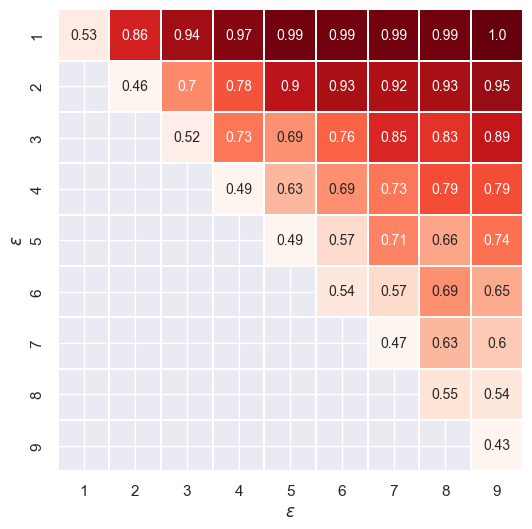

In [8]:
df_baseline_results_graph = df_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

## 3.2 Spot Point Heuristic

In [9]:
## Run Simulation 

########################## PARAMETERS ###################################

iterations = default_iterations
starting_score = 501

#########################################################################

tokens1 = 0
tokens0 = 0

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp_baseline = []

for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            spot_points0 = handicap.get_spot_point_heuristic_handicap(epsilon1,epsilon0)

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                # turns1 = math.ceil((len(sim1_paths[iter]) - 1) / 3)
                # turns0 = math.ceil((len(sim0_paths[iter]) - 1) / 3)
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp_baseline.append([player_id,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.007s.
Ran in 0.010s.
Ran in 0.010s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.003s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.003s.
Ran in 0.004s.
Ran in 0.003s.
Ran in 0.004s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.003s.
Ran in 0.000s.
Ran in 0.008s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.002s.
Ran in 0.000s.
Ran in 0.011s.
Ran in 0.002s.
Ran in 0.006s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.013s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.009s.
Ran in 0.005s.
Ran in 0.004s.
Ran in 0.006s.
Ran in 0.004s.
Ran in 0.006s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.0

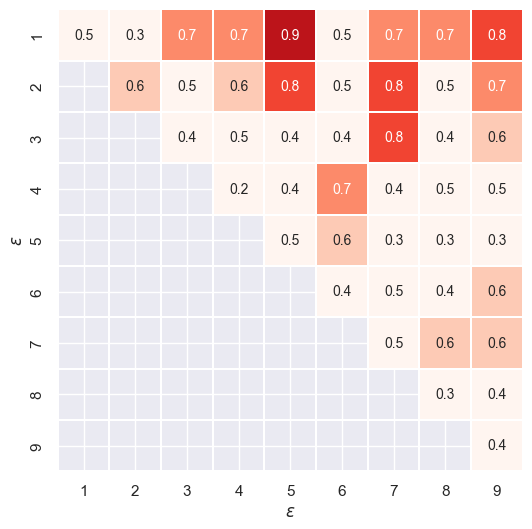

In [10]:
# Plot results 

# Shape into a dataframe
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_baseline_results = pd.DataFrame(data=outcomes_sp_baseline,columns=col_names)

# Reformat dataframe
df_sp_baseline_results = df_sp_baseline_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_baseline_results = df_sp_baseline_results.round(2)

# Create desired graph structure
df_sp_baseline_results_graph = df_sp_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

# Plot 
fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

In [11]:
# df_sp_baseline_results_graph = df_sp_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

# fig = sns.set(rc={'figure.figsize':(6,6)})
# fig = sns.heatmap(df_sp_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
# #fig = plt.title("Difference in expected throws using spot point handicap system")
# fig = plt.xlabel(r'$\epsilon$')
# fig = plt.ylabel(r'$\epsilon$')

## 3.3 Optimized Spot Point 

In [12]:
## Run Simulation 

########################## PARAMETERS ###################################

iterations = default_iterations
starting_score = 501

#########################################################################

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            spot_points0 = handicap.get_spot_point_optimal_handicap(epsilon1,epsilon0)

            #print(epsilon1, epsilon0, start_score_handicap, spot_points0)

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                # need to explicilty count number of turns
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp.append([player_id,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.002s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.008s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.012s.
Ran in 0.003s.
Ran in 0.002s.
Ran in 0.003s.
Ran in 0.004s.
Ran in 0.000s.
Ran in 0.007s.
Ran in 0.002s.
Ran in 0.000s.
Ran in 0.008s.
Ran in 0.002s.
Ran in 0.000s.
Ran in 0.009s.
Ran in 0.000s.
Ran in 0.009s.
Ran in 0.002s.
Ran in 0.000s.
Ran in 0.008s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.009s.
Ran in 0.005s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.000s.
Ran in 0.012s.
Ran in 0.000s.
Ran in 0.008s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.005s.
Ran in 0.000s.
Ran in 0.010s.
Ran in 0.010s.
Ran in 0.005s.
Ran in 0.008s.
Ran in 0.004s.
Ran in 0.004s.
Ran in 0.0

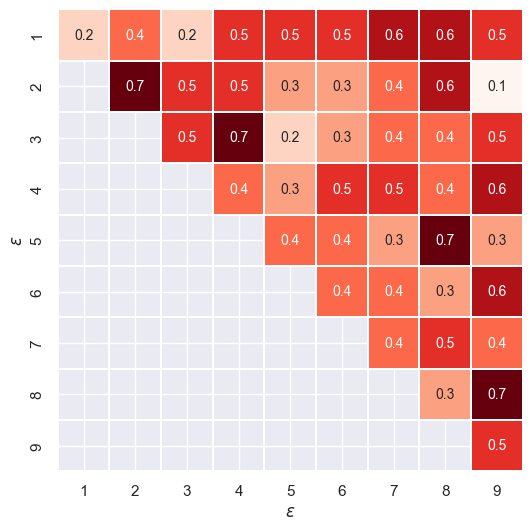

In [13]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_results = pd.DataFrame(data=outcomes_sp,columns=col_names)

df_sp_results = df_sp_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_results = df_sp_results.round(2)

df_sp_results_graph = df_sp_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

## 3.4 Dynamic Credits 

In [14]:
## Run Simulation 

########################## PARAMETERS ###################################

iterations = default_iterations
starting_score = 501

#########################################################################


iterations = 1000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_dynamic_credits = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            credits, credits_lower, credits_higher, threshold_higher_multiplier = handicap.get_dynamic_credits_handicap_full(epsilon1,epsilon0)
            threshold_higher = int(round(iterations * threshold_higher_multiplier))

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            # Run a portion of simulations with credits rounded up 
            sim0_paths = sim0.run_simulation(threshold_higher, starting_score=starting_score, starting_credits=tokens0_higher, spot_darts=spot_darts0, spot_points=spot_points0)
            # Run a portion of simulations with credits rounded down
            sim0_paths.extend(sim0.run_simulation(iterations - threshold_higher, starting_score=starting_score, starting_credits=tokens0_lower, spot_darts=spot_darts0, spot_points=spot_points0))

            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_dynamic_credits.append([player_id,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.255s.


NameError: name 'tokens0_higher' is not defined

In [15]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_dynamic_credits_results = pd.DataFrame(data=outcomes_dynamic_credits,columns=col_names)

df_dynamic_credits_results = df_dynamic_credits_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_dynamic_credits_results = df_dynamic_credits_results.round(2)

df_dynamic_credits_results_graph = df_dynamic_credits_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
#fig = sns.set(rc={'figure.figsize':(4,4)})
fig = sns.heatmap(df_dynamic_credits_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')


KeyError: 'winner_strong'